### For this section we perform some basic Predictive Modeling task: Binary Classification (Stock Up/Down)

### We Import necessary libraries and Load Dataset

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wmt_df = pd.read_csv("wmt_data.csv")

### Data Preprocessing and Feature Engineering

In [15]:
# Convert Date to datetime and set as index
wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])
wmt_df.set_index('Date', inplace=True)

### Splitting the Dataset 

In [16]:
# Sort by date
wmt_df.sort_index(inplace=True)

### Creating Features

In [17]:
# Create features
wmt_df['Daily Return'] = wmt_df['Close'].pct_change()
wmt_df['MA5'] = wmt_df['Close'].rolling(window=5).mean()
wmt_df['MA10'] = wmt_df['Close'].rolling(window=10).mean()
wmt_df['Volatility_10d'] = wmt_df['Daily Return'].rolling(window=10).std()
wmt_df['Volume_Change'] = wmt_df['Volume'].pct_change()

In [18]:
# Create target variable: 1 if next day’s close is higher than today’s
wmt_df['Target'] = (wmt_df['Close'].shift(-1) > wmt_df['Close']).astype(int)

In [19]:
# Drop NA values
wmt_model_df = wmt_df[['Daily Return', 'MA5', 'MA10', 'Volatility_10d', 'Volume_Change', 'Target']].dropna()

In [20]:
from sklearn.model_selection import train_test_split
# Features and target
X = wmt_model_df.drop('Target', axis=1)
y = wmt_model_df['Target']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Model Training

In [21]:
# Replace inf and -inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs (formerly infs) and align targets
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Predictions

In [26]:


# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.5243716679360244

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.05      0.09      1243
           1       0.53      0.95      0.68      1383

    accuracy                           0.52      2626
   macro avg       0.50      0.50      0.38      2626
weighted avg       0.50      0.52      0.40      2626



In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 0.5243716679360244
Confusion Matrix:
 [[  63 1180]
 [  69 1314]]


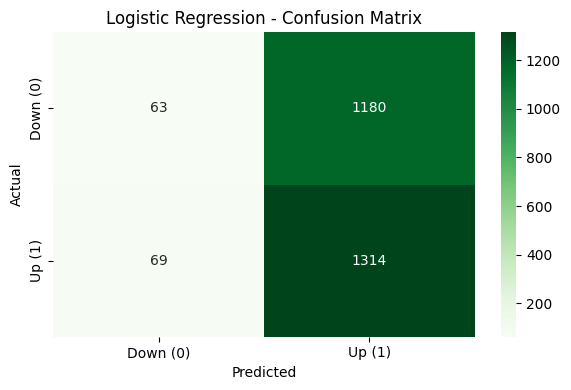

In [28]:
# Generate predictions using the trained Logistic Regression model
y_lr_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_lr_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Down (0)', 'Up (1)'],
            yticklabels=['Down (0)', 'Up (1)'])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest with class_weight to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict
y_rf_pred = rf_model.predict(X_test)
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]


In [ ]:
# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_rf_pred))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Down (0)', 'Up (1)'], yticklabels=['Down (0)', 'Up (1)'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()